In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import os
import gmaps
import walkscore
from sklearn import linear_model
import statsmodels.api as sm
import scipy.stats as st
from scipy.stats import linregress
from pandas import json_normalize

from config import api_key
# Census API Key
#from config import api_key
#c = Census(api_key, year=2013)


In [2]:
#Read in master dataset and create dataframe to work with
csv_path="master_dataset_walkscore_bikescore.csv"
walk_df=pd.read_csv(csv_path)
walk_df=pd.DataFrame(walk_df)
#Remove no existand yelp ratings since will be needed for all comparisons
walk_bike_df=walk_df[walk_df['yelp_rating'].notna()]
#Remove n/a from walk and bike score separately.  N/a differs between the two
walk_df=walk_bike_df[walk_bike_df['Walk Score'].notna()]
bike_df=walk_bike_df[walk_bike_df['Bike Score'].notna()]




In [3]:
#Clean each dataset into Panda only
walk_bike_df=walk_bike_df[walk_bike_df['name']=='Panda Express']
walk_df=walk_df[walk_df['name']=="Panda Express"]
bike_df=bike_df[bike_df['name']=='Panda Express']
len(bike_df)

1993

<BarContainer object of 9 artists>

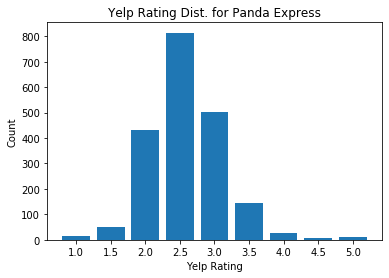

In [4]:
#  Panda Express yelp rating distribution
walk_bike_df['Counts']=walk_bike_df['yelp_rating']
walk_bike_df
yp_df=walk_bike_df.groupby(['yelp_rating'])['Counts'].count()
yp_df=pd.DataFrame(yp_df)
yp_df
yp_rat=['1.0','1.5','2.0','2.5','3.0','3.5','4.0','4.5','5.0']
yp_df['Rating']=yp_rat
yp_df
y_count=yp_df['Rating']
x_count=yp_df['Counts']

plt.xlabel('Yelp Rating')
plt.ylabel("Count")
plt.title("Yelp Rating Dist. for Panda Express")
plt.bar(y_count, x_count)

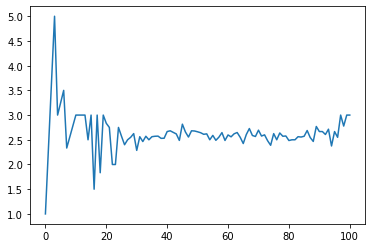

In [5]:
# Plotting panda express walk score to yelp rating.  Used averge since there were multiples of walk scores
walk_df=walk_df.sort_values(by=['Walk Score'], ascending=True)
walk_df_2=walk_df.groupby(['Walk Score'])['yelp_rating'].mean()
walk_df_2
# yp_df=walk_bike_df.groupby(['yelp_rating'])['Counts'].count()
plt.plot(walk_df_2)

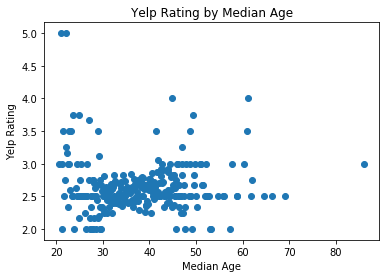

In [6]:
#Median age to yelp rating scatter plot.  Also breaking down other variables for analysis.

walk_bike_df=walk_bike_df.sort_values(by=['Median Age'], ascending=True)
med_age=walk_bike_df['Median Age'].unique()
med_age_df=walk_bike_df.groupby('Median Age')['yelp_rating'].mean()
plt.xlabel('Median Age')
plt.ylabel('Yelp Rating')
plt.title("Yelp Rating by Median Age")
plt.scatter(med_age, med_age_df)

y=walk_bike_df['yelp_rating']
x_pop=walk_bike_df['Population']
x_med=walk_bike_df['Median Age']
x_pci=walk_bike_df['Per Capita Income']
x_house=walk_bike_df['Household Income']
x_pov=walk_bike_df['Poverty Rate']
x_unem=walk_bike_df['Unemployement Rate']
x_walk=walk_df['Walk Score']
y_walk=walk_df['yelp_rating']
x_bike=bike_df['Bike Score']
y_bike=bike_df['yelp_rating']
walk_df

correlation = st.pearsonr(x_med, y)
#print(f"The correlation between both factors is {round(correlation[0],2)}")

cp_slope, cp_int, cp_r, vc_p, cp_std_err = st.linregress(x_med, y)
cp_fit = cp_slope * x_med + cp_int

#plt.scatter(x_med,y)
#plt.plot(x_med,cp_fit,"--")
# plt.xticks(weight, rotation=90)
# plt.xlabel('Weight (g)')
# plt.ylabel('Tumor Volume (mm3)')
# plt.show()

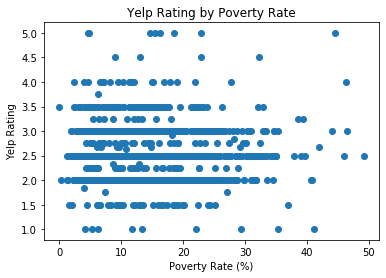

In [7]:
#Poverty rate to yelp rating scatter plot
walk_bike_df=walk_bike_df.sort_values(by=['Poverty Rate'], ascending=True)
pov_rat=walk_bike_df['Poverty Rate'].unique()
pov_rat_df=walk_bike_df.groupby('Poverty Rate')['yelp_rating'].mean()
plt.xlabel('Poverty Rate (%)')
plt.ylabel('Yelp Rating')
plt.title("Yelp Rating by Poverty Rate")
plt.scatter(pov_rat, pov_rat_df)

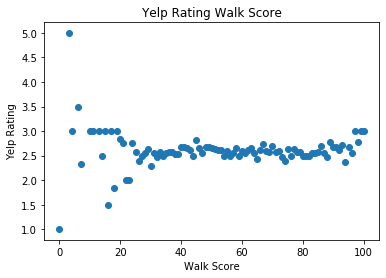

In [8]:
walk_df=walk_df.sort_values(by=['Walk Score'], ascending=True)
walk_rat=walk_df['Walk Score'].unique()
walk_rat_df=walk_df.groupby('Walk Score')['yelp_rating'].mean()
plt.xlabel('Walk Score')
plt.ylabel('Yelp Rating')
plt.title("Yelp Rating Walk Score")
plt.scatter(walk_rat, walk_rat_df)

In [ ]:
#Census information
#Chipotle Walk
# x=chip_walk_df[['Walk Score']]
# y=chip_walk_df[['yelp_rating']]
# model = sm.OLS(y,x).fit()
# predictions = model.predict(x)
# model.summary()

In [9]:
y=walk_bike_df['yelp_rating']
x_pop=walk_bike_df['Population']
x_med=walk_bike_df['Median Age']
x_pci=walk_bike_df['Per Capita Income']
x_house=walk_bike_df['Household Income']
x_pov=walk_bike_df['Poverty Rate']
x_unem=walk_bike_df['Unemployement Rate']
x_walk=walk_df['Walk Score']
y_walk=walk_df['yelp_rating']
x_bike=bike_df['Bike Score']
y_bike=bike_df['yelp_rating']
walk_df

,Column 1,zip_code,yelp_rating,price_tag,review_count,lat,lng,name,name 2,storeid,...,Per Capita Income,Poverty Count,Unemployment,city_name,state_name,state_name 2,Poverty Rate,Unemployement Rate,Walk Score,Bike Score
2751,2751,98433,1.0,NaN,2.0,47.0990,-122.5702,Panda Express,1,1596,...,17719,2209,198,TACOMA,WA,West,11.682268,1.047120,0,20.0
2488,2488,62225,5.0,NaN,2.0,38.5430,-89.8526,Panda Express,1,1426,...,22659,235,95,SCOTT AIR FORCE BASE,IL,Midwest,4.582683,1.852574,3,38.0
364,364,86442,3.0,$,25.0,35.1663,-114.5644,Panda Express,1,171,...,22435,6196,1024,BULLHEAD CITY,AZ,West,18.467408,3.052070,4,24.0
2609,2609,77406,3.5,NaN,8.0,29.6933,-95.8317,Panda Express,1,1504,...,42747,2806,630,RICHMOND,TX,South,5.990478,1.344976,6,28.0
1821,1821,80015,2.5,$,52.0,39.6142,-104.8148,Panda Express,1,1009,...,38193,2018,1359,AURORA,CO,West,2.969437,1.999735,7,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,563,94607,2.5,$,73.0,37.8038,-122.2731,Panda Express,1,279,...,36394,6986,1322,OAKLAND,CA,West,26.609279,5.035423,99,89.0
512,512,20010,3.0,$,53.0,38.9296,-77.0332,Panda Express,1,253,...,49681,4613,1375,WASHINGTON,DC,East,13.288970,3.961052,99,97.0
2324,2324,10036,3.0,$$,84.0,40.7610,-73.9911,Panda Express,1,1316,...,80259,4183,964,NEW YORK,NY,East,15.250839,3.514657,100,95.0
292,292,60601,3.5,$,19.0,41.8849,-87.6231,Panda Express,1,135,...,92125,1183,592,CHICAGO,IL,Midwest,8.061329,4.034072,100,81.0


In [10]:
# Pop to yelp rating
model = sm.OLS(y,x_pop).fit()
predictions = model.predict(x_pop)
model.summary()
correlation = st.pearsonr(x_pop, y)
print(f"The correlation between both factors is {round(correlation[0],2)}")

cp_slope, cp_int, cp_r, vc_p, cp_std_err = st.linregress(x_pop, y)
cp_fit = cp_slope * x_pop + cp_int

The correlation between both factors is -0.11


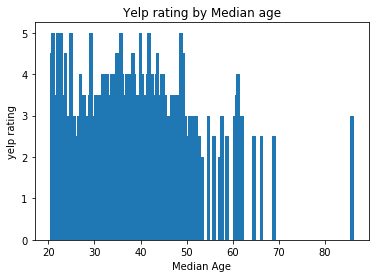

In [11]:
#Median Age
plt.bar(x_med,y)
plt.xlabel('Median Age')
plt.ylabel("yelp rating")
plt.title("Yelp rating by Median age")
plt.show()

In [12]:
# Median age to yelp rating
model = sm.OLS(y,x_med).fit()
predictions = model.predict(x_med)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            yelp_rating   R-squared (uncentered):                   0.937
Model:                            OLS   Adj. R-squared (uncentered):              0.937
Method:                 Least Squares   F-statistic:                          2.961e+04
Date:                Wed, 20 May 2020   Prob (F-statistic):                        0.00
Time:                        16:22:07   Log-Likelihood:                         -2024.8
No. Observations:                1999   AIC:                                      4052.
Df Residuals:                    1998   BIC:                                      4057.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Median Age     0.0687      0.000    172.071      0.000       0.068       0.069
==============================================================================
Omnibus:                      197.191   Durbin-Watson:                   1.778
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              593.180
Skew:                           0.507   Prob(JB):                    1.56e-129
Kurtosis:                       5.469   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

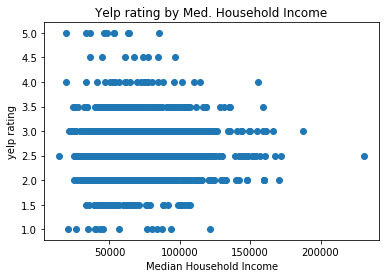

In [13]:
# yelp rating ot Household income
plt.scatter(x_house,y)
plt.xlabel('Median Household Income')
plt.ylabel("yelp rating")
plt.title("Yelp rating by Med. Household Income")
plt.show()

In [14]:
# Household income to yelp rating
model = sm.OLS(y,x_house).fit()
predictions = model.predict(x_house)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            yelp_rating   R-squared (uncentered):                   0.847
Model:                            OLS   Adj. R-squared (uncentered):              0.847
Method:                 Least Squares   F-statistic:                          1.106e+04
Date:                Wed, 20 May 2020   Prob (F-statistic):                        0.00
Time:                        16:22:11   Log-Likelihood:                         -2907.9
No. Observations:                1999   AIC:                                      5818.
Df Residuals:                    1998   BIC:                                      5823.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Household Income  3.298e-05   3.14e-07    105.188      0.000    3.24e-05    3.36e-05
==============================================================================
Omnibus:                      117.188   Durbin-Watson:                   0.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.738
Skew:                          -0.449   Prob(JB):                     2.57e-44
Kurtosis:                       4.266   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

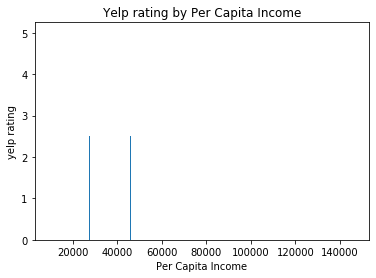

In [15]:
# Per capita income to yelp rating
plt.bar(x_pci,y)
plt.xlabel('Per Capita Income')
plt.ylabel("yelp rating")
plt.title("Yelp rating by Per Capita Income")
plt.show()

In [16]:
# Per Capita Income to yelp rating
model = sm.OLS(y,x_pci).fit()
predictions = model.predict(x_pci)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            yelp_rating   R-squared (uncentered):                   0.824
Model:                            OLS   Adj. R-squared (uncentered):              0.824
Method:                 Least Squares   F-statistic:                              9333.
Date:                Wed, 20 May 2020   Prob (F-statistic):                        0.00
Time:                        16:22:22   Log-Likelihood:                         -3050.1
No. Observations:                1999   AIC:                                      6102.
Df Residuals:                    1998   BIC:                                      6108.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Per Capita Income  6.442e-05   6.67e-07     96.606      0.000    6.31e-05    6.57e-05
==============================================================================
Omnibus:                      486.955   Durbin-Watson:                   1.153
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1926.063
Skew:                          -1.137   Prob(JB):                         0.00
Kurtosis:                       7.238   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# Poverty Rate to yelp rating
model = sm.OLS(y,x_pov).fit()
predictions = model.predict(x_pov)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            yelp_rating   R-squared (uncentered):                   0.697
Model:                            OLS   Adj. R-squared (uncentered):              0.697
Method:                 Least Squares   F-statistic:                              4601.
Date:                Wed, 20 May 2020   Prob (F-statistic):                        0.00
Time:                        16:22:25   Log-Likelihood:                         -3590.4
No. Observations:                1999   AIC:                                      7183.
Df Residuals:                    1998   BIC:                                      7188.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Poverty Rate     0.1480      0.002     67.832      0.000       0.144       0.152
==============================================================================
Omnibus:                      209.686   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              290.899
Skew:                          -0.818   Prob(JB):                     6.79e-64
Kurtosis:                       3.904   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# Unemployement Rate to yelp rating
model = sm.OLS(y,x_unem).fit()
predictions = model.predict(x_unem)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            yelp_rating   R-squared (uncentered):                   0.828
Model:                            OLS   Adj. R-squared (uncentered):              0.828
Method:                 Least Squares   F-statistic:                              9626.
Date:                Wed, 20 May 2020   Prob (F-statistic):                        0.00
Time:                        16:22:28   Log-Likelihood:                         -3024.6
No. Observations:                1999   AIC:                                      6051.
Df Residuals:                    1998   BIC:                                      6057.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Unemployement Rate     0.7785      0.008     98.110      0.000       0.763       0.794
==============================================================================
Omnibus:                      135.776   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.318
Skew:                          -0.528   Prob(JB):                     6.46e-48
Kurtosis:                       4.222   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Walk Score to yelp rating
model = sm.OLS(y_walk,x_walk).fit()
predictions = model.predict(x_walk)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            yelp_rating   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.878
Method:                 Least Squares   F-statistic:                          1.442e+04
Date:                Wed, 20 May 2020   Prob (F-statistic):                        0.00
Time:                        16:22:31   Log-Likelihood:                         -2679.2
No. Observations:                1999   AIC:                                      5360.
Df Residuals:                    1998   BIC:                                      5366.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Walk Score     0.0404      0.000    120.102      0.000       0.040       0.041
==============================================================================
Omnibus:                       72.479   Durbin-Watson:                   0.723
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.968
Skew:                           0.370   Prob(JB):                     3.23e-22
Kurtosis:                       3.801   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

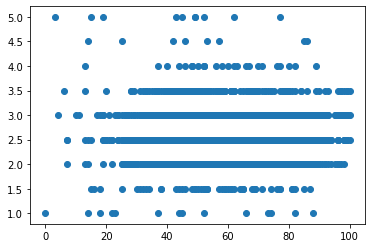

In [20]:
plt.scatter(x_walk,y_walk)

In [21]:
# Bike Score to yelp rating
model = sm.OLS(y_bike,x_bike).fit()
predictions = model.predict(x_bike)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            yelp_rating   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.878
Method:                 Least Squares   F-statistic:                          1.435e+04
Date:                Wed, 20 May 2020   Prob (F-statistic):                        0.00
Time:                        16:22:36   Log-Likelihood:                         -2670.2
No. Observations:                1993   AIC:                                      5342.
Df Residuals:                    1992   BIC:                                      5348.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Bike Score     0.0442      0.000    119.811      0.000       0.044       0.045
==============================================================================
Omnibus:                        7.137   Durbin-Watson:                   1.663
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                8.855
Skew:                           0.017   Prob(JB):                       0.0119
Kurtosis:                       3.325   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

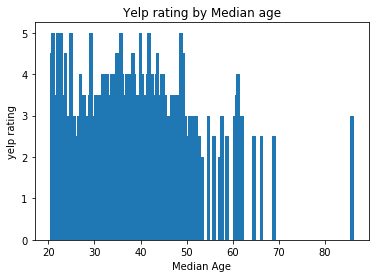

In [22]:
plt.bar(x_med,y)
plt.xlabel('Median Age')
plt.ylabel("yelp rating")
plt.title("Yelp rating by Median age")
plt.show()


The correlation between both factors is -0.0


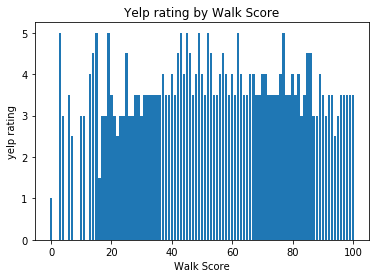

In [23]:
y=walk_df['yelp_rating']
x=walk_df['Walk Score']
correlation=st.pearsonr(x, y)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# cp_slope, cp_int, cp_r, vc_p, cp_std_err = st.linregress(x, y)
# cp_fit = cp_slope * x + cp_int

plt.bar(x,y)
#plt.plot(x,cp_fit,"--")
plt.xlabel('Walk Score')
plt.ylabel("yelp rating")
plt.title("Yelp rating by Walk Score")
plt.show()

In [24]:
walk_bike_df.head()

,Column 1,zip_code,yelp_rating,price_tag,review_count,lat,lng,name,name 2,storeid,...,Poverty Count,Unemployment,city_name,state_name,state_name 2,Poverty Rate,Unemployement Rate,Walk Score,Bike Score,Counts
2007,2007,21402,4.5,$,4.0,38.9955,-76.4691,Panda Express,1,1117,...,0,45,ANNAPOLIS,MD,East,0.000000,0.702138,25,29.0,4.5
1865,1865,93043,2.5,$,3.0,34.1476,-119.1931,Panda Express,1,1027,...,0,0,PORT HUENEME CBC BASE,CA,West,0.000000,0.000000,76,61.0,2.5
2347,2347,22211,4.0,$$,3.0,38.8824,-77.0807,Panda Express,1,1333,...,0,0,FORT MYER,VA,East,0.000000,0.000000,67,64.0,4.0
3251,3251,61112,3.0,$,4.0,42.2460,-88.9756,Panda Express,1,1976,...,0,0,ROCKFORD,IL,Midwest,0.000000,0.000000,43,44.0,3.0
1344,1344,23511,2.0,$,34.0,36.9434,-76.3095,Panda Express,1,724,...,26,58,NORFOLK,VA,East,0.187279,0.417777,50,53.0,2.0


In [25]:
gb_walk_df=walk_df.groupby(['name'])['Walk Score']
gb_bike_df=bike_df.groupby(['name'])['Bike Score']
combo_df=pd.DataFrame(gb_walk_df.mean())
walk_sum_df=gb_walk_df.count()
walk_std_df=gb_walk_df.std()
bike_mean_df=gb_bike_df.mean()
bike_sum_df=gb_bike_df.count()
bike_std_df=gb_bike_df.std()
combo_df['Walk Score count']=walk_sum_df
combo_df['Walk Score Std']=walk_std_df
combo_df['Bike Score Average']=bike_mean_df
combo_df['Bike Score count']=bike_sum_df
combo_df['Bike Score Std']=bike_std_df
combo_df

,Walk Score,Walk Score count,Walk Score Std,Bike Score Average,Bike Score count,Bike Score Std
name,,,,,,
Panda Express,58.814407,1999,17.67862,53.790768,1993,15.795247


In [26]:
csv_path="Aggregated Restaurant comparison.csv"
agg_df=pd.read_csv(csv_path)
agg_df=pd.DataFrame(agg_df)
combo_all_df=pd.merge(left=agg_df, right=combo_df, on='name', how='inner')
combo_all_df.to_csv("combo_all_rest_comp.csv", index=False)

In [27]:
pan_walk_df=walk_df[walk_df['name']=='Panda Express']
chip_walk_df=walk_df[walk_df['name']=='Chipotle']
red_lob_walk_df=walk_df[walk_df['name']=='Red Lobster']

pan_walk_df['Norm_Walk']=pan_walk_df['Walk Score']
pan_walk_df



# walk_df=walk_bike_df[walk_bike_df['Walk Score'].notna()]
# bike_df=walk_bike_df[walk_bike_df['Bike Score'].notna()]



,Column 1,zip_code,yelp_rating,price_tag,review_count,lat,lng,name,name 2,storeid,...,Poverty Count,Unemployment,city_name,state_name,state_name 2,Poverty Rate,Unemployement Rate,Walk Score,Bike Score,Norm_Walk
2751,2751,98433,1.0,NaN,2.0,47.0990,-122.5702,Panda Express,1,1596,...,2209,198,TACOMA,WA,West,11.682268,1.047120,0,20.0,0
2488,2488,62225,5.0,NaN,2.0,38.5430,-89.8526,Panda Express,1,1426,...,235,95,SCOTT AIR FORCE BASE,IL,Midwest,4.582683,1.852574,3,38.0,3
364,364,86442,3.0,$,25.0,35.1663,-114.5644,Panda Express,1,171,...,6196,1024,BULLHEAD CITY,AZ,West,18.467408,3.052070,4,24.0,4
2609,2609,77406,3.5,NaN,8.0,29.6933,-95.8317,Panda Express,1,1504,...,2806,630,RICHMOND,TX,South,5.990478,1.344976,6,28.0,6
1821,1821,80015,2.5,$,52.0,39.6142,-104.8148,Panda Express,1,1009,...,2018,1359,AURORA,CO,West,2.969437,1.999735,7,39.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,563,94607,2.5,$,73.0,37.8038,-122.2731,Panda Express,1,279,...,6986,1322,OAKLAND,CA,West,26.609279,5.035423,99,89.0,99
512,512,20010,3.0,$,53.0,38.9296,-77.0332,Panda Express,1,253,...,4613,1375,WASHINGTON,DC,East,13.288970,3.961052,99,97.0,99
2324,2324,10036,3.0,$$,84.0,40.7610,-73.9911,Panda Express,1,1316,...,4183,964,NEW YORK,NY,East,15.250839,3.514657,100,95.0,100
292,292,60601,3.5,$,19.0,41.8849,-87.6231,Panda Express,1,135,...,1183,592,CHICAGO,IL,Midwest,8.061329,4.034072,100,81.0,100


In [28]:
pan_bike_df=bike_df[bike_df['name']=='Panda Express']
chip_bike_df=bike_df[bike_df['name']=='Chipotle']
red_lob_bike_df=bike_df[bike_df['name']=='Red Lobster']
red_lob_bike_df

,Column 1,zip_code,yelp_rating,price_tag,review_count,lat,lng,name,name 2,storeid,...,Per Capita Income,Poverty Count,Unemployment,city_name,state_name,state_name 2,Poverty Rate,Unemployement Rate,Walk Score,Bike Score


In [31]:
#Panda Walk
x=pan_walk_df[['Walk Score']]
y=pan_walk_df[['yelp_rating']]
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            yelp_rating   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.878
Method:                 Least Squares   F-statistic:                          1.442e+04
Date:                Wed, 20 May 2020   Prob (F-statistic):                        0.00
Time:                        16:23:38   Log-Likelihood:                         -2679.2
No. Observations:                1999   AIC:                                      5360.
Df Residuals:                    1998   BIC:                                      5366.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Walk Score     0.0404      0.000    120.102      0.000       0.040       0.041
==============================================================================
Omnibus:                       72.479   Durbin-Watson:                   0.723
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.968
Skew:                           0.370   Prob(JB):                     3.23e-22
Kurtosis:                       3.801   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
#Panda Bike
x=pan_bike_df[['Bike Score']]
y=pan_bike_df[['yelp_rating']]
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            yelp_rating   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.878
Method:                 Least Squares   F-statistic:                          1.435e+04
Date:                Wed, 20 May 2020   Prob (F-statistic):                        0.00
Time:                        16:23:41   Log-Likelihood:                         -2670.2
No. Observations:                1993   AIC:                                      5342.
Df Residuals:                    1992   BIC:                                      5348.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Bike Score     0.0442      0.000    119.811      0.000       0.044       0.045
==============================================================================
Omnibus:                        7.137   Durbin-Watson:                   1.663
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                8.855
Skew:                           0.017   Prob(JB):                       0.0119
Kurtosis:                       3.325   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Chipotle Walk
x=chip_walk_df[['Walk Score']]
y=chip_walk_df[['yelp_rating']]
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
model.summary()

In [ ]:
#Chipotle Bike
x=chip_bike_df[['Bike Score']]
y=chip_bike_df[['yelp_rating']]
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
model.summary()

In [ ]:
#Red Lob Walk
x=red_lob_walk_df[['Walk Score']]
y=red_lob_walk_df[['yelp_rating']]
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
model.summary()

In [ ]:
#Chipotle Bike
x=red_lob_bike_df[['Bike Score']]
y=red_lob_bike_df[['yelp_rating']]
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
model.summary()

In [ ]:
pan_df.aggregate(['sum', 'mean'])
chip_df.aggregate(['sum', 'mean'])
red_lob_df.aggregate(['sum', 'mean'])

In [ ]:
yelp_rat_pan=pan_df.groupby(['yelp_rating'])['Walk Score']
yelp_rat_pan_mean=pd.DataFrame(yelp_rat_pan.mean())
yelp_rat_pan_count=yelp_rat_pan.count()
yelp_rat_pan_med =yelp_rat_pan.median()
print(yelp_rat_pan_mean)
print(yelp_rat_pan_count)
print(yelp_rat_pan_med)

In [ ]:
yelp_rat_chip=chip_df.groupby(['yelp_rating'])['Walk Score']
yelp_rat_chip_mean=pd.DataFrame(yelp_rat_chip.mean())
yelp_rat_chip_count=yelp_rat_chip.count()
yelp_rat_chip_med =yelp_rat_chip.median()
print(yelp_rat_chip_mean)
print(yelp_rat_chip_count)
print(yelp_rat_chip_med)

In [ ]:
yelp_rat_red_lob=red_lob_df.groupby(['yelp_rating'])['Walk Score']
yelp_rat_red_lob_mean=pd.DataFrame(yelp_rat_red_lob.mean())
yelp_rat_red_lob_count=yelp_rat_red_lob.count()
yelp_rat_red_lob_med =yelp_rat_red_lob.median()
print(yelp_rat_red_lob_mean)
print(yelp_rat_red_lob_count)
print(yelp_rat_red_lob_med)

In [ ]:
X=pan_df['Walk Score']
Y=pan_df['yelp_rating']

regr = linear_model.LinearRegression()
regr.fit(X,Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

In [ ]:
# import pandas as pd
# from sklearn import linear_model
# import statsmodels.api as sm

# Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
#                 'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
#                 'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
#                 'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
#                 'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
#                 }

# df = pd.DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price'])

# X = df[['Interest_Rate','Unemployment_Rate']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
# Y = df['Stock_Index_Price']
 
# # with sklearn
# regr = linear_model.LinearRegression()
# regr.fit(X, Y)

# print('Intercept: \n', regr.intercept_)
# print('Coefficients: \n', regr.coef_)

# # prediction with sklearn
# New_Interest_Rate = 2.75
# New_Unemployment_Rate = 5.3
# print ('Predicted Stock Index Price: \n', regr.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))

# # with statsmodels
# X = sm.add_constant(X) # adding a constant
 
# model = sm.OLS(Y, X).fit()
# predictions = model.predict(X) 
 
# print_model = model.summary()
# print(print_model)